In [1]:
import os
import datasets as hfds
import huggingface_hub as hfhub
import torch
import torchvision.transforms.functional as tff
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "../src")
from exlib.datasets.mvtec import *

from mvtec import MVTec

/home/antonxue/lib/miniconda3/envs/exlib/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
hfhub.login(os.getenv("HF_TOKEN"))

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /home/antonxue/.cache/huggingface/token
Login successful


In [3]:
MVTEC_CATEGORIES = [
    "bottle",
    "cable",
    "capsule",
    "carpet",
    "grid",
    "hazelnut",
    "leather",
    "metal_nut",
    "pill",
    "screw",
    "tile",
    "toothbrush",
    "transistor",
    "wood",
    "zipper",
]

In [4]:
# hfds_all = hfds.DatasetDict()

# for cat in MVTEC_CATEGORIES:
#     mvtec_train = MVTec("/home/antonxue/foo/data/mvtec-ad", cat, split="train")
#     mvtec_test = MVTec("/home/antonxue/foo/data/mvtec-ad", cat, split="test")
    
#     def gen_train():
#         for item in mvtec_train:
#             yield {
#                 "image": item["image"],
#                 "mask": item["mask"],
#                 "label": item["label"]
#             }
            
#     def gen_test():
#         for item in mvtec_test:
#             yield {
#                 "image": item["image"],
#                 "mask": item["mask"],
#                 "label": item["label"]
#             }

#     hfds_all[f"{cat}.train"] = hfds.Dataset.from_generator(gen_train)
#     hfds_all[f"{cat}.test"] = hfds.Dataset.from_generator(gen_test)

In [5]:
# plt.clf()
# plt.imshow(hfds_all["cable.train"][0]["image"])

In [6]:
# plt.clf()
# plt.imshow(hfds_all["cable.test"][0]["mask"])

In [7]:
# hfds_all.push_to_hub("BrachioLab/mvtec-ad")

In [8]:
# bottle_train = hfds.load_dataset("BrachioLab/mvtec-ad", split="bottle.train")

In [9]:
# bottle_train[0]["image"]

In [10]:
ds_train = MVTecDataset("bottle", "train", image_size=256)
ds_test = MVTecDataset("bottle", "test", image_size=256)

In [11]:
print(ds_train[0]["image"].shape, ds_train[0]["mask"].shape)
print(ds_test[0]["image"].shape, ds_test[0]["mask"].shape)

torch.Size([3, 256, 256]) torch.Size([256, 256])
torch.Size([3, 256, 256]) torch.Size([256, 256])


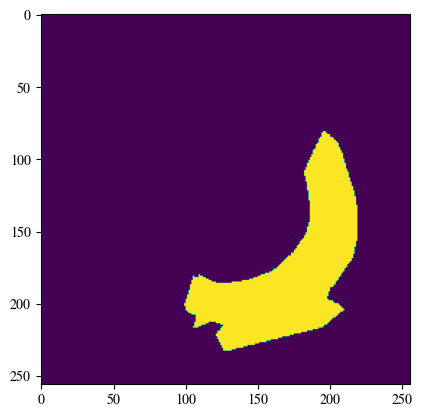

In [12]:
plt.clf()
plt.imshow(ds_test[0]["mask"].numpy())